In [38]:
pwd

'c:\\Users\\Toluwa\\Desktop\\KNN'

In [39]:
import pandas as pd # type: ignore
import sklearn   # type: ignore
import numpy # type: ignore
import seaborn as sn # type: ignore
import matplotlib.pyplot as plt # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.linear_model import LogisticRegression # type: ignore
from sklearn.naive_bayes import GaussianNB # type: ignore
from sklearn.metrics import accuracy_score, confusion_matrix # type: ignore



In [40]:
df=pd.read_csv("c:/Users/Toluwa/Desktop/KNN/Waterdataset.csv")
df.head()

,date,ph,turbidity,solids,chromium,conductivity,hardness,potability
0,1/1/2018,9.445130,3.875165,13168.52916,0.83,592.659021,145.805402,1
1,1/3/2018,9.024845,3.985251,19859.67648,0.68,451.143481,128.096691,1
2,1/6/2018,NaN,2.747313,23403.63730,0.53,475.573562,169.974849,1
3,1/9/2018,6.800119,3.854940,39143.40333,0.03,376.456593,242.008082,1
4,1/10/2018,7.174135,3.939896,20401.10246,0.69,315.549900,203.408935,1


In [41]:
df.describe()
#df.shape

,ph,turbidity,solids,chromium,conductivity,hardness,potability
count,779.000000,912.000000,912.000000,873.000000,912.000000,912.000000,912.000000
mean,7.331521,3.945447,22137.352221,0.718706,426.752222,197.987917,0.512061
std,2.494979,0.787613,8888.852675,0.329021,81.667253,34.165580,0.500129
min,0.227499,1.812529,2808.025756,0.010000,210.319182,47.432000,0.000000
25%,5.996849,3.421016,15338.539553,0.460000,364.512390,178.213958,0.000000
50%,7.160467,3.938100,21284.713075,0.880000,421.086049,199.067577,1.000000
75%,8.335468,4.475458,27776.360457,1.000000,482.607998,218.243182,1.000000
max,52.519126,6.494249,56351.396300,1.000000,695.369528,323.124000,1.000000


problem to be solved:
1. missing value in ph, both upper level & lower outlier
2.  solid with both upper level & lower outlier
3.  hardness with both upper level & lower outlier


In [42]:
#function  for plt
def plot_boxplot(df,ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

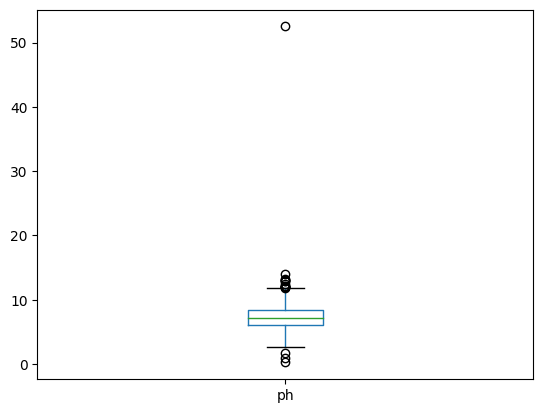

In [43]:
plot_boxplot(df,"ph")

In [44]:
#using percentile method to get the upper_liit and lower_limit
upper_limit=df['ph'].quantile(0.99)
lower_limit=df['ph'].quantile(0.01)

print('upper_limit:', upper_limit)
print('lower_limit:', lower_limit)

upper_limit: 12.176515857000009
lower_limit: 3.4992591227


In [45]:
#getting the outliers
df.loc[(df['ph']>=upper_limit) | (df['ph']<=lower_limit)]

,date,ph,turbidity,solids,chromium,conductivity,hardness,potability
13,2/3/2018,13.175402,4.106924,19237.949680,0.51,500.245952,47.432000,1
104,9/23/2018,2.798549,3.663252,26931.243480,0.41,521.140524,311.383957,1
186,4/20/2019,3.445062,4.184397,33424.768680,1.00,441.785876,207.926260,0
240,9/3/2019,12.844538,5.013463,28689.595780,NaN,410.387264,233.764343,0
241,9/6/2019,52.519126,3.758996,12531.601920,NaN,443.570372,168.728583,0
264,11/3/2019,2.612036,4.765205,34798.252590,1.00,468.080267,188.804126,0
273,11/29/2019,3.388091,2.798601,20230.125580,1.00,353.912927,212.028944,0
331,4/23/2020,12.987000,3.310859,21136.286760,1.00,332.737587,233.850345,0
392,9/26/2020,1.757037,2.967554,41538.242730,0.20,428.444822,147.581831,1
426,12/20/2020,0.227499,3.545741,39028.599340,0.09,443.029232,152.530111,1


In [46]:

#using capping method
df.loc[df['ph']>=upper_limit, 'ph']=upper_limit
df.loc[df['ph']<=lower_limit, 'ph']=lower_limit

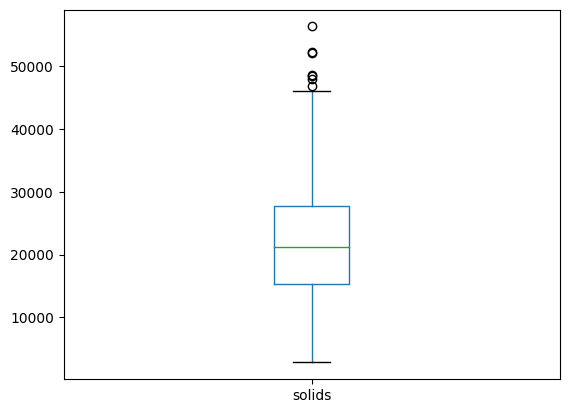

In [47]:

plot_boxplot(df,"solids")

In [48]:
#using percentile method to get the upper_liit and lower_limit
upper_limit=df['solids'].quantile(0.99)
lower_limit=df['solids'].quantile(0.01)

print('upper_limit:', upper_limit)
print('lower_limit:', lower_limit)

upper_limit: 45246.485370400005
lower_limit: 5770.234711109999


In [49]:
#getting the outliers
df.loc[(df['solids']>=upper_limit) | (df['solids']<=lower_limit)]

,date,ph,turbidity,solids,chromium,conductivity,hardness,potability
33,3/26/2018,10.356119,4.201849,48621.563950,1.00,365.720291,136.323752,0
37,4/3/2018,10.003301,4.746382,46113.957490,0.74,574.555041,143.094285,1
116,10/23/2018,4.037288,3.045049,52318.917300,0.02,401.204271,291.461897,1
124,11/9/2018,8.882684,3.827921,4857.253807,0.15,532.336659,135.523062,1
128,11/23/2018,6.105140,3.103090,45249.449030,0.09,314.965090,249.141391,1
155,2/1/2019,NaN,4.120931,46931.884290,0.45,557.421879,286.201763,1
302,2/9/2020,6.825468,3.027450,46140.126850,1.00,373.427235,187.051710,0
366,7/20/2020,NaN,2.000757,52060.226800,0.46,323.001036,155.675777,1
573,12/29/2021,9.953952,4.052905,3773.281147,1.00,339.883029,232.949002,0
601,3/6/2022,7.344976,3.418763,5689.804405,1.00,360.184473,182.306942,0


In [50]:
#using capping method
df.loc[df['solids']>=upper_limit, 'solids']=upper_limit
df.loc[df['solids']<=lower_limit, 'solids']=lower_limit

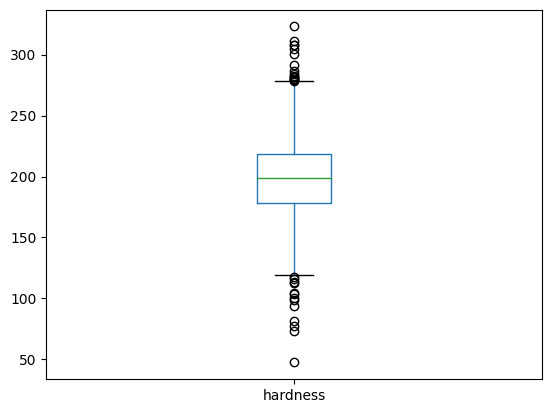

In [51]:

plot_boxplot(df,"hardness")

In [52]:
#using percentile method to get the upper_liit and lower_limit
upper_limit=df['hardness'].quantile(0.99)
lower_limit=df['hardness'].quantile(0.01)

print('upper_limit:', upper_limit)
print('lower_limit:', lower_limit)

upper_limit: 282.61176298299995
lower_limit: 112.467964437


In [53]:
#getting the outliers
df.loc[(df['hardness']>=upper_limit) | (df['hardness']<=lower_limit)]

,date,ph,turbidity,solids,chromium,conductivity,hardness,potability
8,1/23/2018,9.802721,2.764634,27357.45674,0.77,512.428731,98.771644,1
13,2/3/2018,12.176516,4.106924,19237.94968,0.51,500.245952,47.432000,1
28,3/9/2018,10.761898,4.661799,25999.95367,0.62,392.704082,81.710895,1
67,6/20/2018,11.301794,3.309580,39227.61946,1.00,410.856114,77.459586,0
71,6/30/2018,4.642953,3.982867,16115.92986,0.04,439.944408,307.706024,1
85,8/3/2018,10.026224,3.736228,25510.09730,0.41,388.467266,94.091307,1
92,8/23/2018,5.910252,3.660923,15244.84639,0.77,695.369528,282.739017,1
97,9/3/2018,3.551579,3.965994,38969.38899,0.18,514.762918,323.124000,1
104,9/23/2018,3.499259,3.663252,26931.24348,0.41,521.140524,311.383957,1
116,10/23/2018,4.037288,3.045049,45246.48537,0.02,401.204271,291.461897,1


In [54]:
#using capping method
df.loc[df['hardness']>=upper_limit, 'hardness']=upper_limit
df.loc[df['hardness']<=lower_limit, 'hardness']=lower_limit

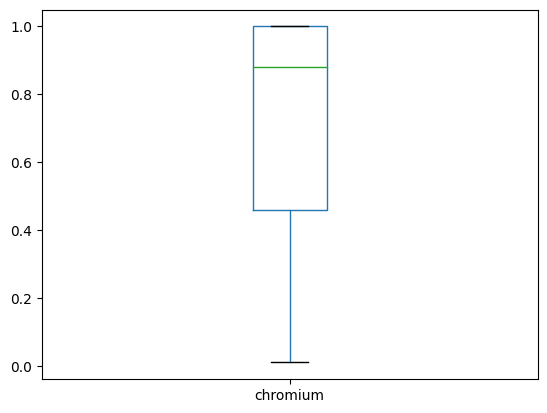

In [55]:
plot_boxplot(df,"chromium")

In [56]:
#using percentile method to get the upper_liit and lower_limit
upper_limit=df['chromium'].quantile(0.99)
lower_limit=df['chromium'].quantile(0.01)

print('upper_limit:', upper_limit)
print('lower_limit:', lower_limit)

upper_limit: 1.0
lower_limit: 0.02


In [57]:
#getting the outliers
df.loc[(df['chromium']>=upper_limit) | (df['chromium']<=lower_limit)]

,date,ph,turbidity,solids,chromium,conductivity,hardness,potability
30,3/16/2018,9.794559,2.945419,20682.731740,1.00,427.123948,129.870958,0
33,3/26/2018,10.356119,4.201849,45246.485370,1.00,365.720291,136.323752,0
51,5/9/2018,10.049674,5.133478,11557.032040,1.00,442.768050,132.832837,0
53,5/12/2018,NaN,3.807920,27776.180260,1.00,417.631202,181.689164,0
54,5/16/2018,8.923981,4.155583,27919.770670,1.00,415.629484,135.938468,0
...,...,...,...,...,...,...,...,...
748,3/12/2023,8.746986,4.763731,22174.781140,1.00,407.380825,148.393724,0
749,3/16/2023,8.154841,3.696328,25620.771370,1.00,597.870073,202.317335,0
772,5/12/2023,NaN,4.387208,19947.434470,0.01,295.757053,200.315236,1
873,1/26/2024,6.646470,4.387602,5770.234711,0.02,339.208703,251.836248,1


In [58]:
#using capping method
df.loc[df['chromium']>=upper_limit, 'chromium']=upper_limit
df.loc[df['chromium']<=lower_limit, 'chromium']=lower_limit

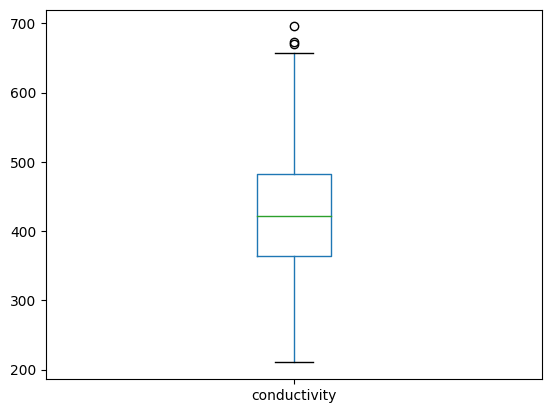

In [59]:
plot_boxplot(df,"conductivity")


In [60]:
#using percentile method to get the upper_liit and lower_limit
upper_limit=df['conductivity'].quantile(0.99)
lower_limit=df['conductivity'].quantile(0.01)

print('upper_limit:', upper_limit)
print('lower_limit:', lower_limit)

upper_limit: 615.3691202849999
lower_limit: 265.665066582


In [61]:
#getting the outliers
df.loc[(df['conductivity']>=upper_limit) | (df['conductivity']<=lower_limit)]

,date,ph,turbidity,solids,chromium,conductivity,hardness,potability
24,3/1/2018,NaN,3.772919,16146.157110,0.13,629.281247,156.520635,1
92,8/23/2018,5.910252,3.660923,15244.846390,0.77,695.369528,282.611763,1
117,10/26/2018,6.505873,4.497529,29534.690290,0.33,265.251199,240.287912,1
226,7/30/2019,5.058109,5.106656,34873.934520,1.00,669.725086,238.569380,0
268,11/12/2019,6.098157,3.977362,27776.901050,1.00,245.859632,189.995846,0
275,12/1/2019,NaN,5.629016,28062.641890,1.00,263.771913,190.423899,0
300,2/3/2020,8.594416,3.568992,15791.675350,1.00,672.556999,270.022706,0
312,3/3/2020,6.579969,4.575932,17657.084180,1.00,254.393276,197.226981,0
337,5/6/2020,NaN,3.665522,19517.724800,1.00,251.020899,260.205360,0
345,5/30/2020,9.534022,2.768239,9472.614920,1.00,259.636803,201.955208,0


In [62]:
#using capping method
df.loc[df['conductivity']>=upper_limit, 'conductivity']=upper_limit
df.loc[df['conductivity']<=lower_limit, 'conductivity']=lower_limit

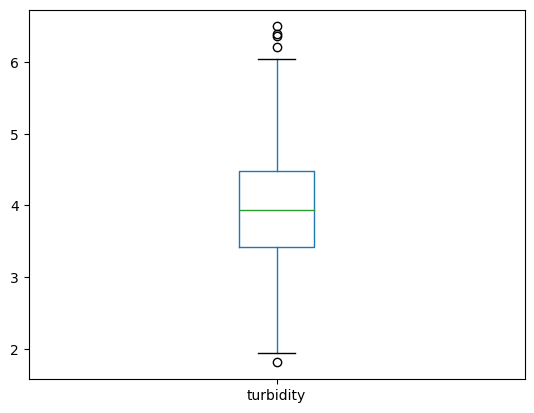

In [63]:
plot_boxplot(df,"turbidity")

In [64]:
#using percentile method to get the upper_liit and lower_limit
upper_limit=df['turbidity'].quantile(0.99)
lower_limit=df['turbidity'].quantile(0.01)

print('upper_limit:', upper_limit)
print('lower_limit:', lower_limit)

upper_limit: 5.71217619652
lower_limit: 2.18275083505


In [65]:
#getting the outliers
df.loc[(df['turbidity']>=upper_limit) | (df['turbidity']<=lower_limit)]

,date,ph,turbidity,solids,chromium,conductivity,hardness,potability
17,2/15/2018,5.626340,1.943319,14442.418880,0.88,346.553206,230.857983,1
70,6/29/2018,NaN,5.922582,14507.017810,1.00,290.889472,144.815264,0
132,12/3/2018,5.772718,6.494249,26124.931410,0.32,465.559286,213.363545,1
189,4/29/2019,NaN,6.038185,15193.413470,1.00,563.804743,148.153061,0
253,10/6/2019,9.026788,2.019042,27965.072150,1.00,588.319650,253.217074,0
279,12/9/2019,7.812804,6.204846,42550.841820,1.00,442.545774,196.583886,0
315,3/9/2020,6.906992,2.124759,19991.239150,1.00,356.459137,216.785291,0
358,6/30/2020,5.554437,2.095914,31344.460390,1.00,306.872526,229.122829,0
366,7/20/2020,NaN,2.000757,45246.485370,0.46,323.001036,155.675777,1
399,10/9/2020,7.376449,5.767355,37191.114140,0.73,439.312853,168.750007,1


In [66]:
#using capping method
df.loc[df['turbidity']>=upper_limit, 'turbidity']=upper_limit
df.loc[df['turbidity']<=lower_limit, 'turbidity']=lower_limit

In [67]:
df.describe()

,ph,turbidity,solids,chromium,conductivity,hardness,potability
count,779.000000,912.000000,912.000000,873.000000,912.000000,912.000000,912.000000
mean,7.283906,3.943342,22107.008862,0.718751,426.560319,198.050821,0.512061
std,1.850466,0.772897,8742.772179,0.328923,80.493110,32.818950,0.500129
min,3.499259,2.182751,5770.234711,0.020000,265.665067,112.467964,0.000000
25%,5.996849,3.421016,15338.539553,0.460000,364.512390,178.213958,0.000000
50%,7.160467,3.938100,21284.713075,0.880000,421.086049,199.067577,1.000000
75%,8.335468,4.475458,27776.360457,1.000000,482.607998,218.243182,1.000000
max,12.176516,5.712176,45246.485370,1.000000,615.369120,282.611763,1.000000


In [68]:
#missing values for ph and chromium

df.ph=df.ph.fillna(df.ph.mean())
df.chromium=df.chromium.fillna(df.chromium.mean())

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          912 non-null    object 
 1   ph            912 non-null    float64
 2   turbidity     912 non-null    float64
 3   solids        912 non-null    float64
 4   chromium      912 non-null    float64
 5   conductivity  912 non-null    float64
 6   hardness      912 non-null    float64
 7   potability    912 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 57.1+ KB


In [70]:
#dropping of Date

df=df.drop(['date'],axis=1)

In [71]:
#checking for the correlation field
df.corr()

,ph,turbidity,solids,chromium,conductivity,hardness,potability
ph,1.000000,-0.021646,-0.153469,0.020666,0.024244,-0.056119,-0.092723
turbidity,-0.021646,1.000000,0.034845,0.009239,-0.024584,-0.050480,0.015325
solids,-0.153469,0.034845,1.000000,-0.002705,0.011328,-0.163927,0.016199
chromium,0.020666,0.009239,-0.002705,1.000000,-0.031327,-0.022756,-0.801812
conductivity,0.024244,-0.024584,0.011328,-0.031327,1.000000,-0.069545,-0.001795
hardness,-0.056119,-0.050480,-0.163927,-0.022756,-0.069545,1.000000,0.007326
potability,-0.092723,0.015325,0.016199,-0.801812,-0.001795,0.007326,1.000000


In [72]:
#data spliting
y = df.iloc[:, -1].values
X =df.drop(["potability","conductivity","hardness","turbidity"],axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [73]:
from sklearn import preprocessing # type: ignore
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaler = scaler.transform(X_train)

scaler = preprocessing.StandardScaler().fit(X_test)
X_test_scaler = scaler.transform(X_test)

In [76]:
# using KNN model
from sklearn.neighbors import KNeighborsClassifier # type: ignore
KNN_classifier = KNeighborsClassifier(n_neighbors=7)
KNN_classifier.fit(X_train_scaler,y_train)
y_pred=KNN_classifier.predict(X_test)
#Accuracy=accuracy_score(X_test_scaler, y_pred)
#print(f'The model has {round(100 * Accuracy,2)}% of accuracy')

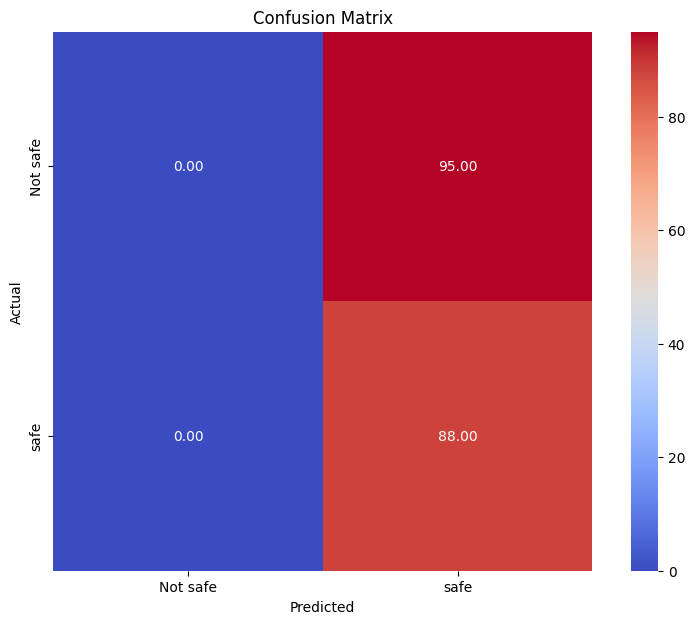

In [ ]:
# Confusion matrix
Conf_mx=confusion_matrix(y_test, y_pred)
class_names = ['Not safe', 'safe']
plt.figure(figsize=(10, 7))
sn.heatmap(Conf_mx, fmt='.2f', square=True, linecolor='white', annot=True, cmap="coolwarm", xticklabels=class_names, yticklabels=class_names);
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [77]:
from sklearn.model_selection import GridSearchCV # type: ignore
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9]}
Grid_Search_CV =GridSearchCV(KNeighborsClassifier(),params)

Grid_Search_CV.fit(X_train_scaler,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [79]:
Grid_Search_CV.best_params_

{'n_neighbors': 1}